###             LOAN STATUS PREDICTION

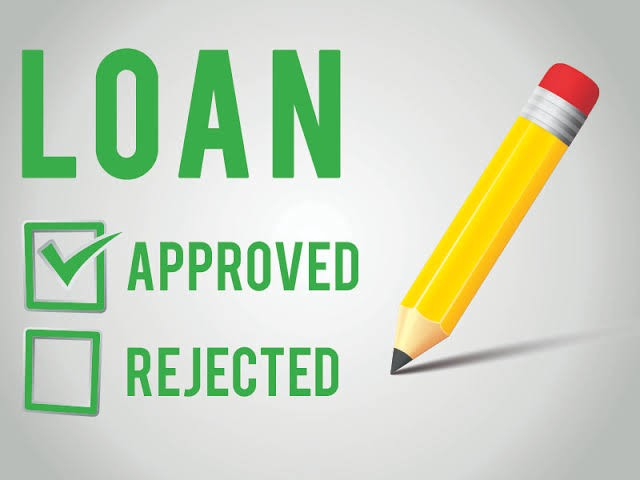

### DESCRIPTION OF THE PROJECT

It is a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not.
The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers


In [7]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Downloads/Loan Prediction.csv")
df=pd.DataFrame(dataset)
df

Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           2      Graduate            No   
1    LP001003    Male     Yes           3      Graduate            No   
2    LP001005    Male     Yes           2      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           2      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           2      Graduate            No   
610  LP002979    Male     Yes           0      Graduate            No   
611  LP002983    Male     Yes           0      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849             1379.0         431               153   
1               4583             1508.0         128               360   
2               3000                0.0          66               360   
3               2583             2358.0         120               360   
4               6000                0.0         141               360   
..               ...                ...         ...               ...   
609             2900                0.0          71               360   
610             4106                0.0          40               180   
611             8072              240.0         253               360   
612             7583                0.0         187               360   
613             4583                0.0         133               360   

     Credit_History Property_Area Loan_Status  
0                 0         Urban           Y  
1                 1         Rural           N  
2                 1         Urban           Y  
3                 1         Urban           Y  
4                 1         Urban           Y  
..              ...           ...         ...  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N  

[614 rows x 13 columns]

In [8]:
from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 62.5+ KB


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df.describe()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     1.454397      5403.459283        1623.491726  147.239414   
std      1.089939      6109.041673        2925.531126   87.060346   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      1.000000      3812.500000        1211.500000  128.000000   
75%      2.000000      5795.000000        2297.250000  167.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         339.016287        0.817590  
std           68.106311        0.386497  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000

In [13]:
df.shape

(614, 13)

### CHECKING NULL VALUES

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### CHECKING DUPLICATES

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [16]:
df.duplicated().sum()

0

### PRINTING THE FIRST FIVE ROWS

In [17]:
df.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           2      Graduate            No   
1  LP001003   Male     Yes           3      Graduate            No   
2  LP001005   Male     Yes           2      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           2      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849             1379.0         431               153   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History Property_Area Loan_Status  
0               0         Urban           Y  
1               1         Rural           N  
2               1         Urban           Y  
3               1         Urban           Y  
4               1         Urban           Y

### PRINTING THE LAST FIVE ROWS

In [18]:
df.tail()

Loan_ID  Gender Married  Dependents Education Self_Employed  \
609  LP002978  Female      No           2  Graduate            No   
610  LP002979    Male     Yes           0  Graduate            No   
611  LP002983    Male     Yes           0  Graduate            No   
612  LP002984    Male     Yes           2  Graduate            No   
613  LP002990  Female      No           0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0          71               360   
610             4106                0.0          40               180   
611             8072              240.0         253               360   
612             7583                0.0         187               360   
613             4583                0.0         133               360   

     Credit_History Property_Area Loan_Status  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N

### CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [19]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
        

In [21]:
df.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           2          1              0   
1        1       1        1           3          1              0   
2        2       1        1           2          1              1   
3        3       1        1           0          0              0   
4        4       1        0           2          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849             1379.0         431               153   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Property_Area  Loan_Status  
0               0              2            1  
1               1              0            0  
2               1              2            1  
3               1              2            1  
4               1              2            1

### CREATION OF NEW ATTRIBURES

In [22]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           2          1              0   
1          1       1        1           3          1              0   
2          2       1        1           2          1              1   
3          3       1        1           0          0              0   
4          4       1        0           2          1              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           2          1              0   
610      610       1        1           0          1              0   
611      611       1        1           0          1              0   
612      612       1        1           2          1              0   
613      613       0        0           0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849             1379.0         431               153   
1               4583             1508.0         128               360   
2               3000                0.0          66               360   
3               2583             2358.0         120               360   
4               6000                0.0         141               360   
..               ...                ...         ...               ...   
609             2900                0.0          71               360   
610             4106                0.0          40               180   
611             8072              240.0         253               360   
612             7583                0.0         187               360   
613             4583                0.0         133               360   

     Credit_History  Property_Area  Loan_Status  Total_Income  
0                 0              2            1        7228.0  
1                 1              0            0        6091.0  
2                 1              2            1        3000.0  
3                 1              2            1        4941.0  
4                 1              2            1        6000.0  
..              ...            ...          ...           ...  
609               1              0            1        2900.0  
610               1              0            1        4106.0  
611               1              2            1        8312.0  
612               1              2            1        7583.0  
613               0              1            0        4583.0  

[614 rows x 14 columns]

### EXPLORATORY DATA  ANALYSIS

Exploratory Data Analysis is an approach to analyze the data using visual techniques.
It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

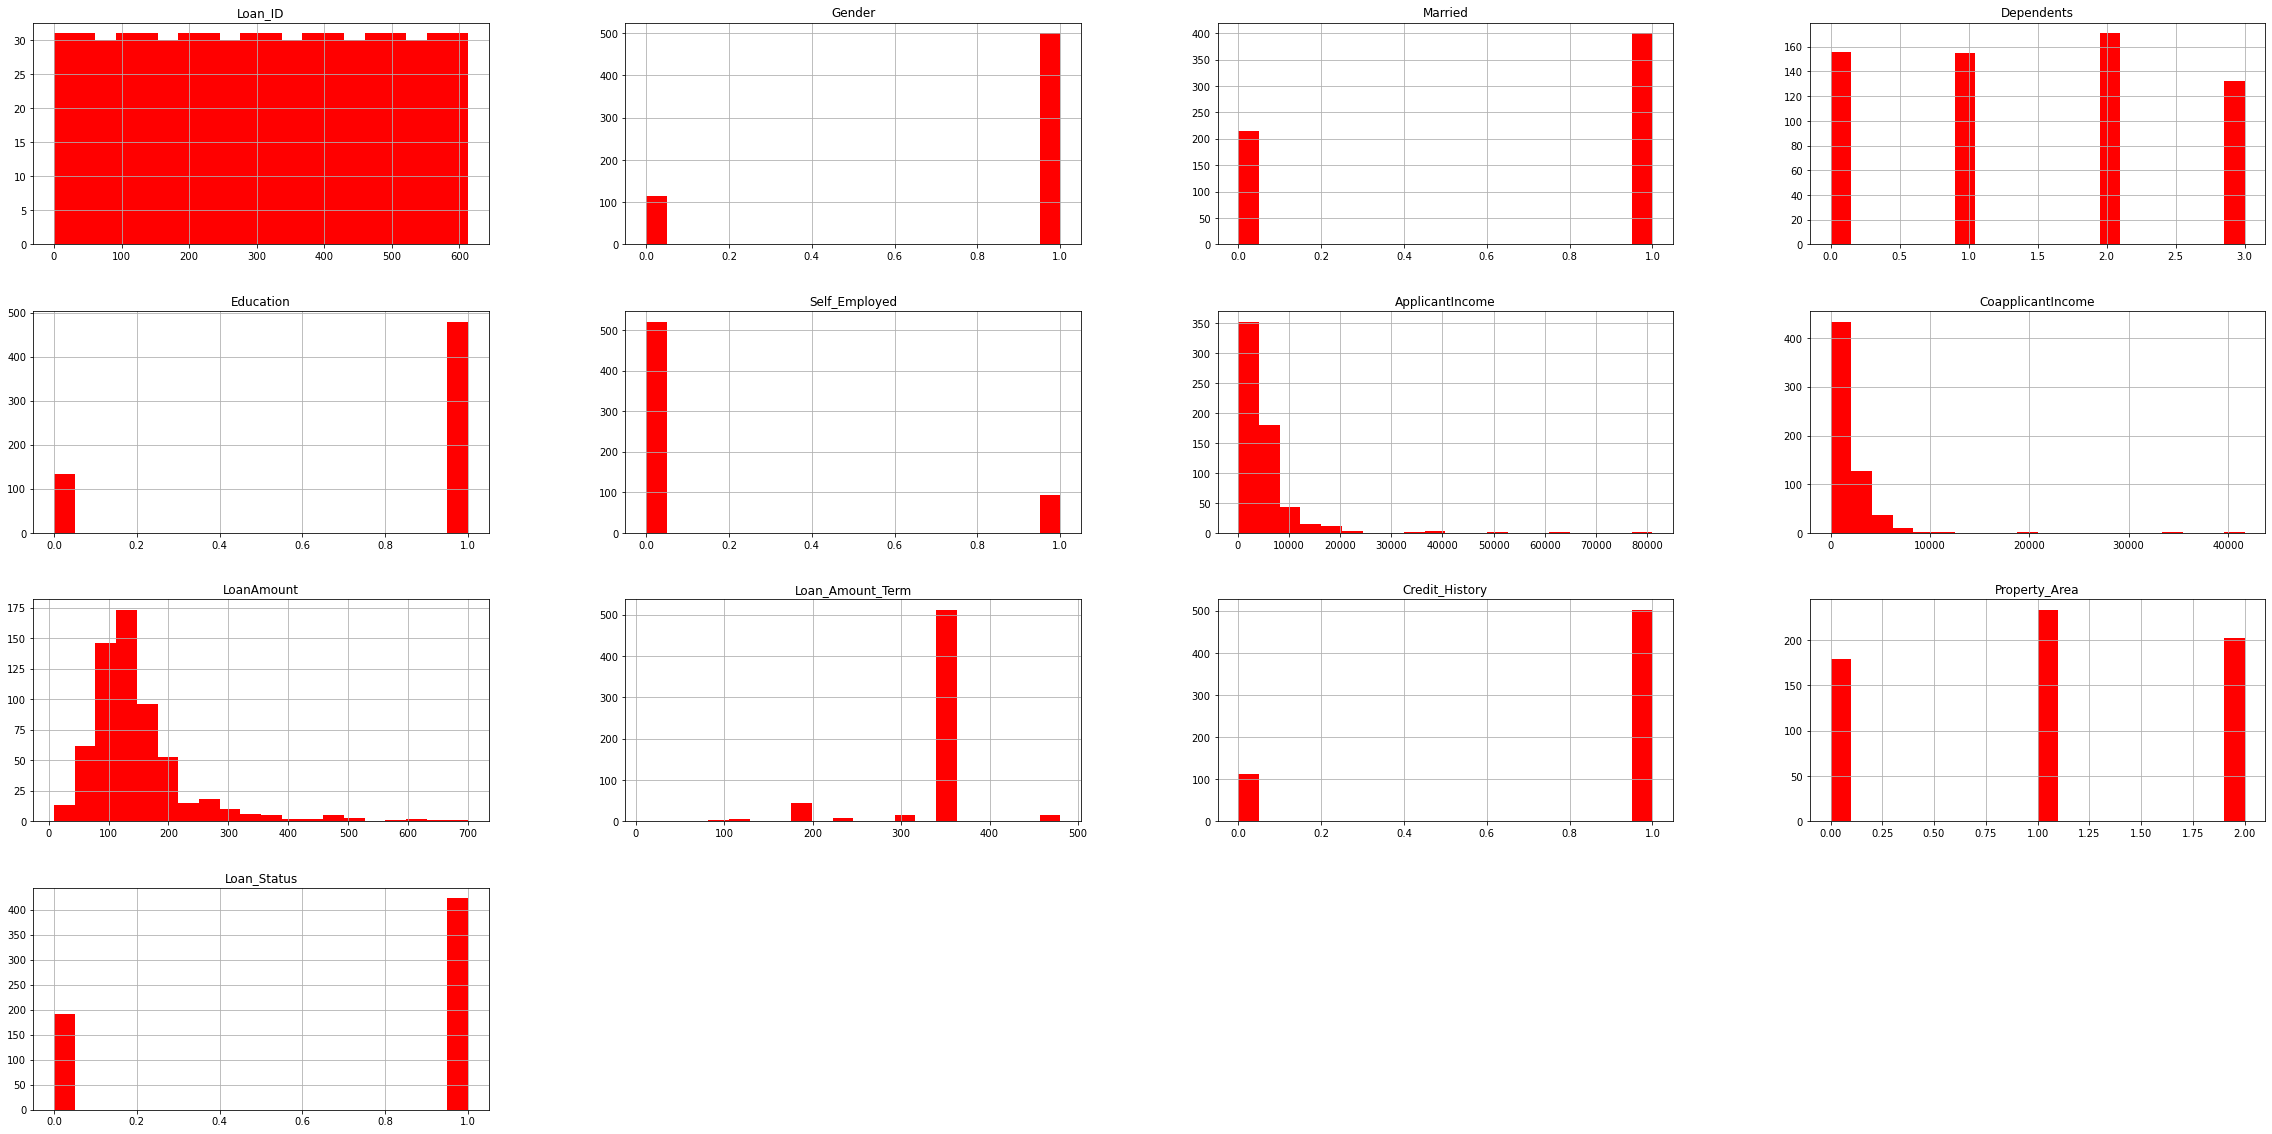

In [33]:
df.hist(bins=20,figsize=(40,20),color='r')
plt.show()

### BOXPLOT

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

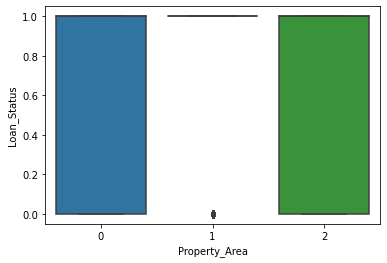

In [39]:
sns.boxplot(data=df,x="Property_Area",y="Loan_Status")

### LINEPLOT

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

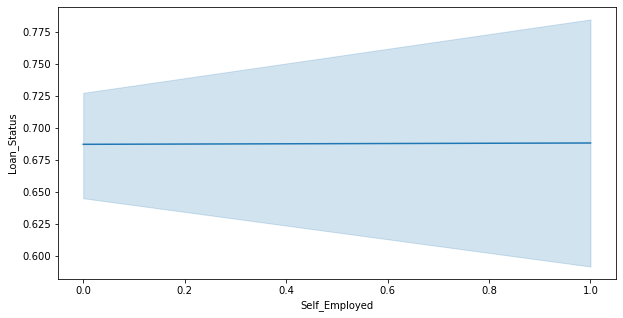

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Self_Employed', y='Loan_Status')

### COUNTPLOT

In [ ]:
HERE 1 REPRESENTS MALE AND 0 REPRESENTS FEMALE FROM BELOW DIAGRAM WE CONCLUDE THAT THE MALE ARE GETTING MORE LOAN THAN FEMALE AND THEIR LOAN STATUS WAS APPROVED COMPARE TO FEMALE LOAN STATUS  

<AxesSubplot:xlabel='Gender', ylabel='count'>

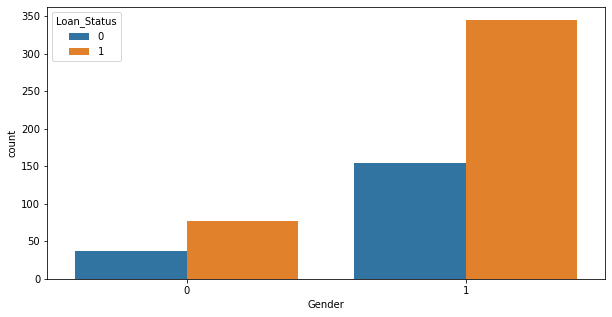

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='Loan_Status')

In [ ]:
FROM THESE DIAGRAM WE CONCLUDE THAT THE EDUCATED PEPOLE ARE GETTING MORE LOANS THAN THE FEMALES 

<AxesSubplot:xlabel='Education', ylabel='count'>

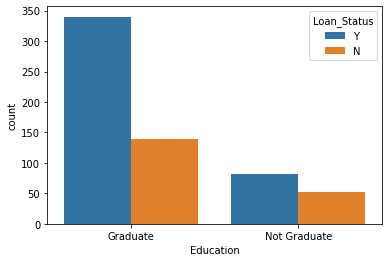

In [15]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

### BARPLOT

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

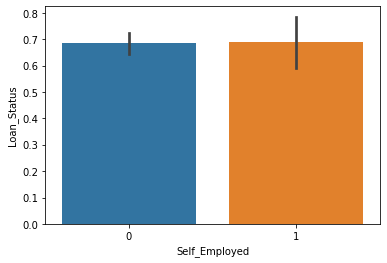

In [43]:
sns.barplot(df.Self_Employed,df.Loan_Status)

### VISUALIZATION USING PAIRPLOT

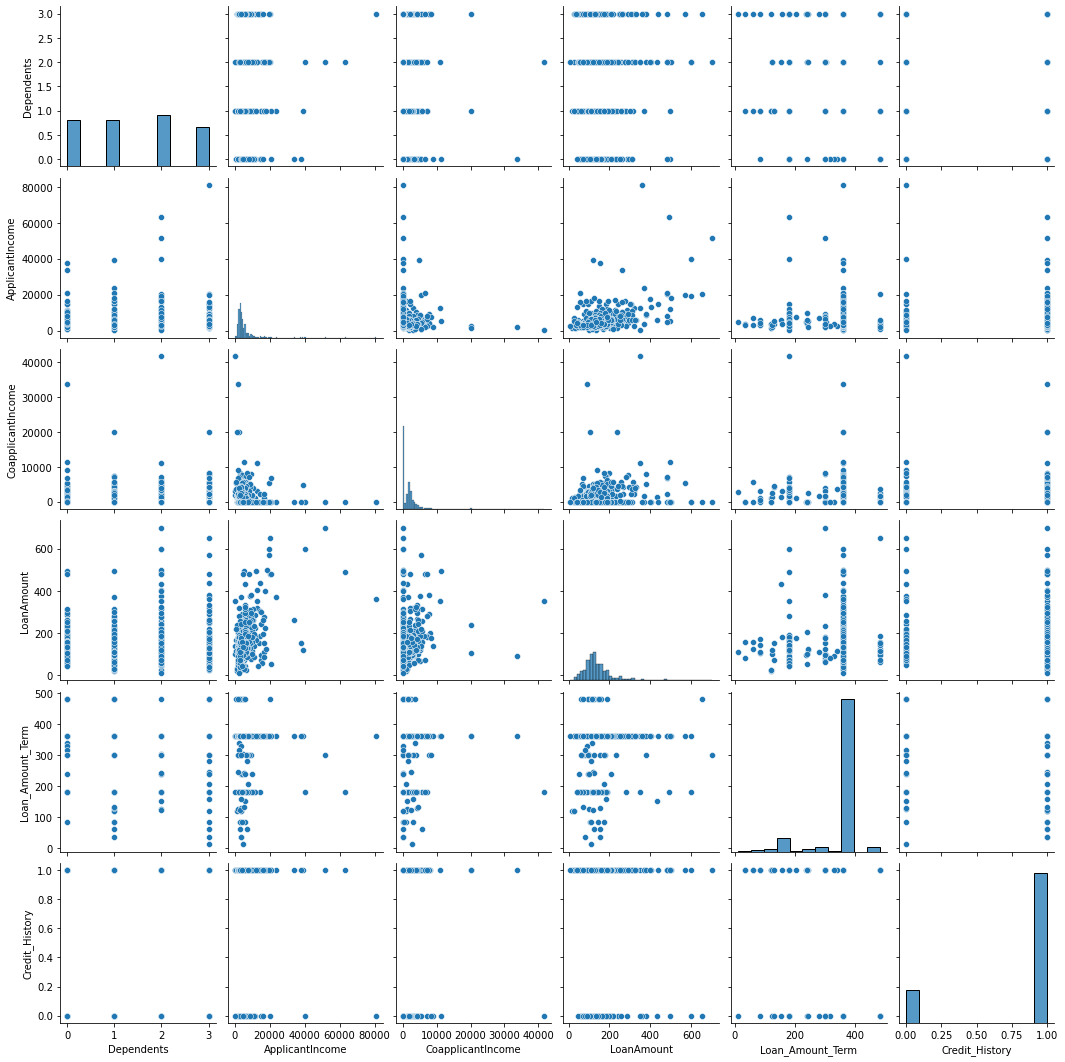

In [42]:
import seaborn as sns 
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

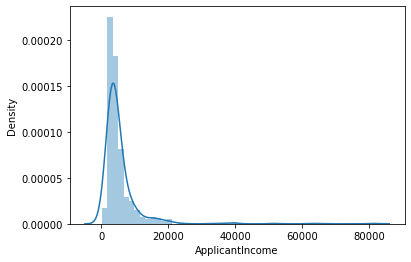

In [12]:
import seaborn as sns
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

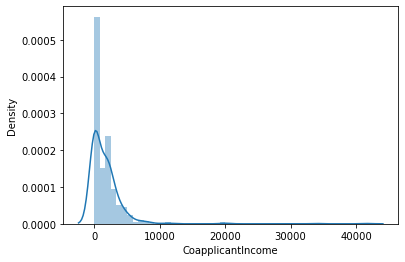

In [13]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

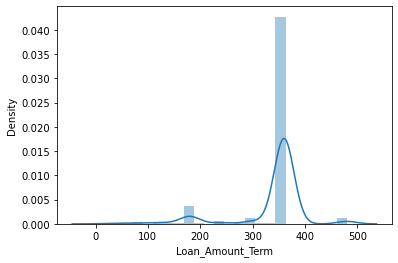

In [15]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

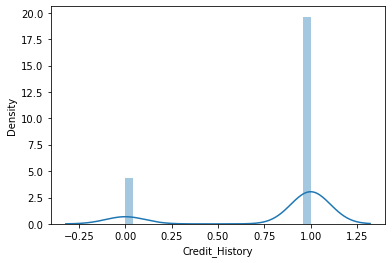

In [14]:
sns.distplot(df['Credit_History'])

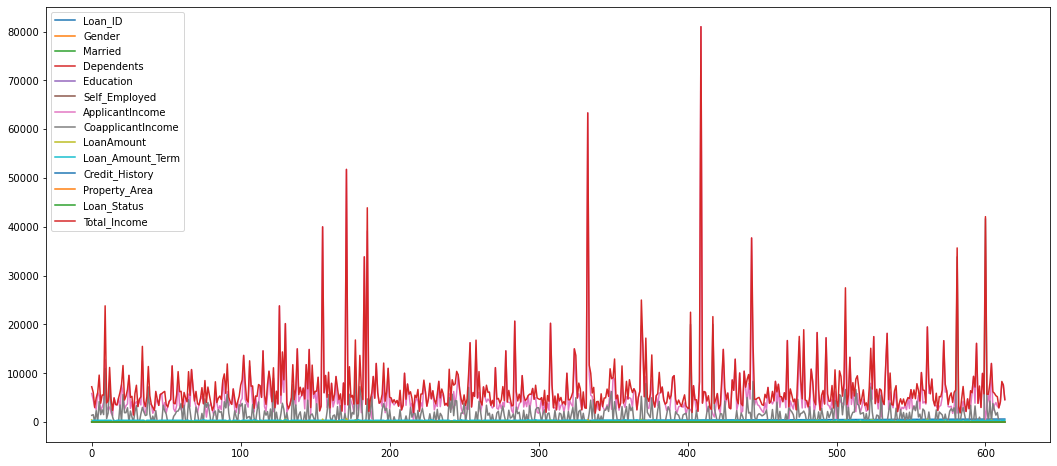

In [44]:
import matplotlib.pyplot as plt
df.plot(figsize=(18, 8))

plt.show()

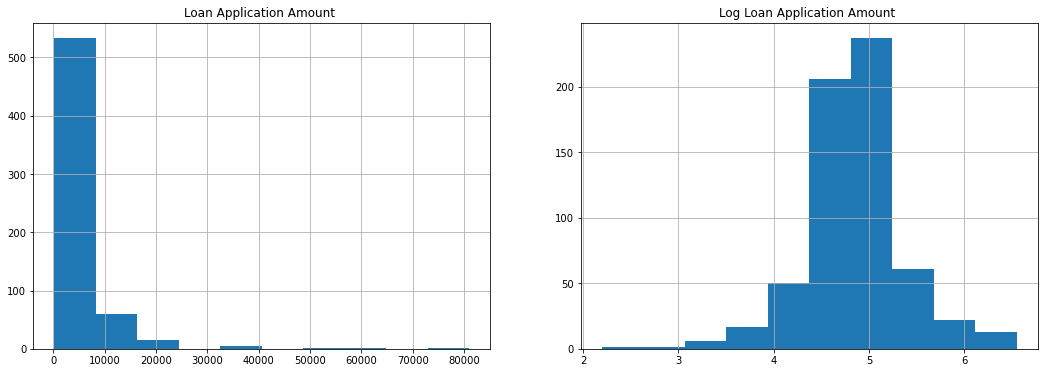

In [46]:
import numpy as np
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

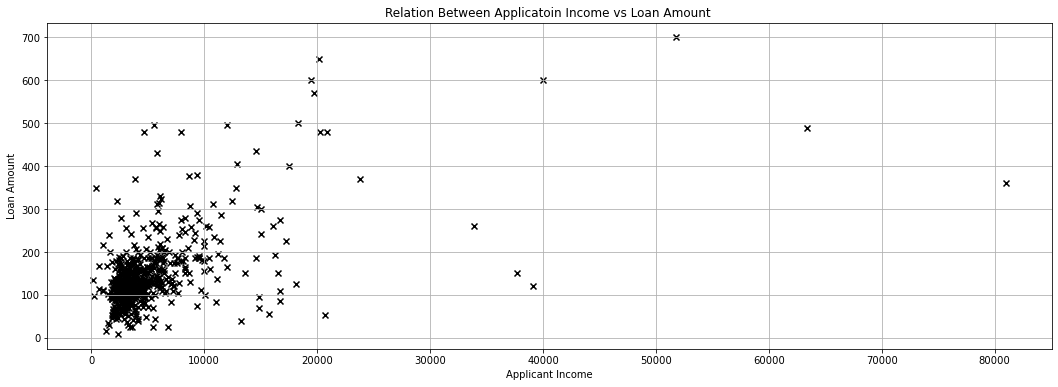

In [48]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

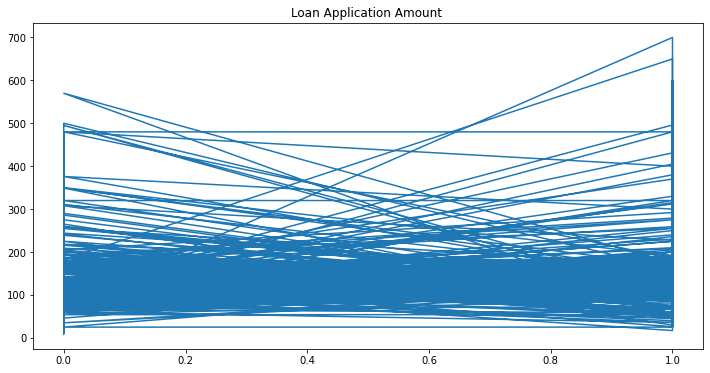

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df['Loan_Status'], df['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

### CORRELATION

In [2]:
corr=df.corr()
corr

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents           1.000000         0.041854          -0.010457    0.096552   
ApplicantIncome      0.041854         1.000000          -0.116577    0.539539   
CoapplicantIncome   -0.010457        -0.116577           1.000000    0.184765   
LoanAmount           0.096552         0.539539           0.184765    1.000000   
Loan_Amount_Term    -0.036338        -0.034860          -0.064834    0.034228   
Credit_History       0.015074        -0.005619          -0.052931   -0.033073   

                   Loan_Amount_Term  Credit_History  
Dependents                -0.036338        0.015074  
ApplicantIncome           -0.034860       -0.005619  
CoapplicantIncome         -0.064834       -0.052931  
LoanAmount                 0.034228       -0.033073  
Loan_Amount_Term           1.000000        0.061033  
Credit_History             0.061033        1.000000

<AxesSubplot:>

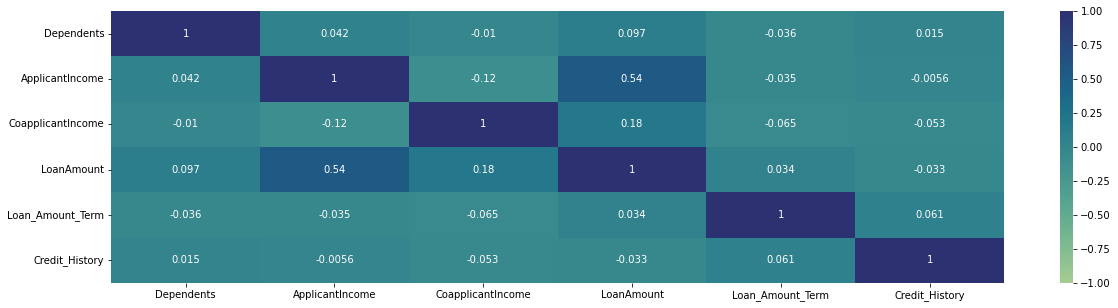

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True, vmin=-1, cmap='crest')

<AxesSubplot:>

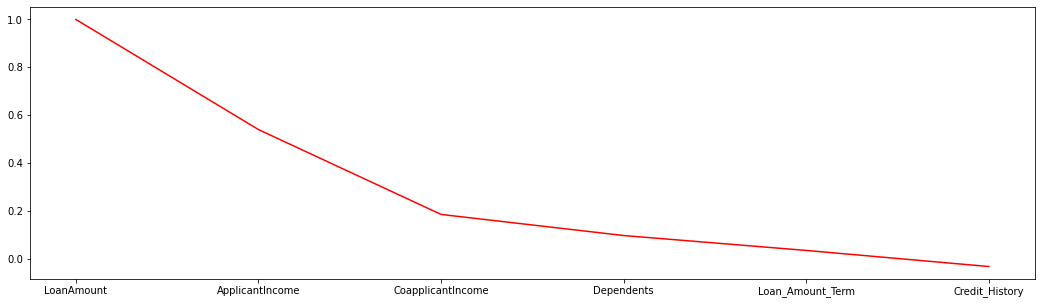

In [38]:
plt.figure(figsize=(18,5))
corr['LoanAmount'].sort_values(ascending=False).plot(color='r')

In [22]:
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

### TESTING AND TRAINING THE MODEL

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=0)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(614, 12) (552, 12) (62, 12)


### USING SUPPORT VECTOR MACHINE TO PREDICT ACCURACY

In [41]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [42]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred=classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8064516129032258

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[12,  7],
       [ 4, 39]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.85      0.91      0.88        43

    accuracy                           0.82        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.82      0.82      0.82        62



### TO PREDICT ACCURACY USING LOGISTIC REGRESSION

The project is to predict whether the person is eligible for getting loan or not. So for this problem, I use Classification
method called Logistic Regression. Logistic regression is an example of supervised learning. It is used to calculate or predict 
the probability of a binary (yes/no) event occurring

In [25]:
from sklearn.linear_model import LogisticRegression
data=LogisticRegression()
data.fit(X_train,Y_train)


LogisticRegression()

In [26]:
X_test

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
268      268       0        0           0          1              0   
505      505       1        1           2          1              0   
337      337       1        1           0          1              1   
446      446       1        1           1          0              0   
425      425       1        1           0          1              0   
..       ...     ...      ...         ...        ...            ...   
444      444       1        1           3          1              0   
316      316       1        1           2          1              0   
280      280       1        0           2          0              1   
227      227       1        1           3          1              0   
111      111       0        1           0          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
268             3418                0.0         135               360   
505             3510             4416.0         243               360   
337             2500             4600.0         176               360   
446             4652                0.0         110               360   
425             2666             4300.0         121               360   
..               ...                ...         ...               ...   
444             7333             8333.0         175               300   
316             3717                0.0         120               360   
280             4053             2426.0         158               360   
227             6250             1695.0         210               360   
111             2929             2333.0         139               360   

     Credit_History  Property_Area  
268               1              0  
505               1              0  
337               1              0  
446               1              0  
425               1              0  
..              ...            ...  
444               0              0  
316               1              1  
280               0              2  
227               1              1  
111               1              1  

[62 rows x 12 columns]

In [27]:
proba=data.predict(X_test)
data.predict_proba(X_test)

array([[0.26221201, 0.73778799],
       [0.25646366, 0.74353634],
       [0.19460962, 0.80539038],
       [0.24999025, 0.75000975],
       [0.18335743, 0.81664257],
       [0.73941572, 0.26058428],
       [0.3503213 , 0.6496787 ],
       [0.20341927, 0.79658073],
       [0.25952225, 0.74047775],
       [0.25984405, 0.74015595],
       [0.22053727, 0.77946273],
       [0.14284432, 0.85715568],
       [0.41080966, 0.58919034],
       [0.20055177, 0.79944823],
       [0.74725125, 0.25274875],
       [0.25365357, 0.74634643],
       [0.16259416, 0.83740584],
       [0.85228059, 0.14771941],
       [0.21716752, 0.78283248],
       [0.16842908, 0.83157092],
       [0.12073334, 0.87926666],
       [0.7099883 , 0.2900117 ],
       [0.17180431, 0.82819569],
       [0.61711785, 0.38288215],
       [0.21536576, 0.78463424],
       [0.23705728, 0.76294272],
       [0.1226847 , 0.8773153 ],
       [0.64883189, 0.35116811],
       [0.8016859 , 0.1983141 ],
       [0.17097398, 0.82902602],
       [0.

In [62]:
y_pred=data.predict(X_test)
y_pred_train=data.predict(X_train)
print(y_pred)

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1]


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
a=accuracy_score(Y_test,proba)
print(a)

0.8225806451612904


In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,proba)
          

array([[11,  8],
       [ 3, 40]], dtype=int64)

In [30]:

print(classification_report(Y_test,proba))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.85      0.91      0.88        43

    accuracy                           0.82        62
   macro avg       0.80      0.77      0.78        62
weighted avg       0.82      0.82      0.82        62



### HYPERPARAMETER TUNING

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this
optimized algorithm to any data set. That combination of hyperparameters maximizes the models performance, minimizing a 
predefined loss function to produce better results with fewer errors for improving the accuracy I used hyperparameter tuning for 
logistic regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X, Y)
print("Best score is {}".format(logreg_cv.best_score_))

Best score is 0.9739999999999999


### DISPLAYING TRUE AND FALSE POSITIVE RATE

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_proba=model.predict_proba(X_test)
y_predicted=y_proba[:,1]
print(y_predicted)


[0.8 0.5 0.5 0.9 0.9 0.4 0.7 0.9 0.8 0.7 0.7 0.4 0.7 0.9 0.3 1.  0.7 0.3
 0.9 0.9 0.6 0.2 0.8 0.3 0.9 0.9 0.9 0.3 0.1 1.  0.7 0.2 0.8 0.9 1.  0.2
 0.4 0.4 0.3 0.2 1.  0.8 0.7 0.9 0.9 0.9 0.8 0.4 0.8 0.8 0.4 0.9 0.9 0.7
 0.9 0.9 0.6 0.1 1.  0.5 0.7 1. ]


In [56]:
fpr,tpr,thresholds=roc_curve(Y_test,y_predicted)

In [57]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.8623011015911872


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

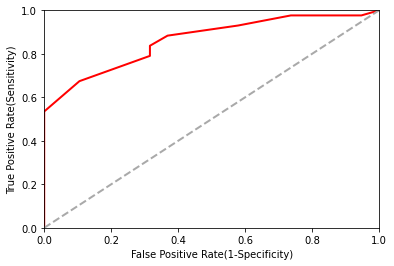

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='r',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')



### PREDICTION FOR A MODEL

In [29]:
Y=data.predict([[1,0,3,1,0,7920,8346,540,470,1,3,8000]])
if(Y==1):
    print("LOAN APPROVED FOR A PERSON")
else:
    print("LOAN REJECTED FOR A PERSON")

LOAN APPROVED FOR A PERSON


FOR THIS PREDICTION I USED SVM AND LOGISTIC REGRESSION BY USING SVM IT GIVES ACCURACY OF 80% FOR LOGISTIC REGRESSION IT GIVES 82% SO I USED HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION TO IMPROVE ACCURACY AND SET DATA TO BE FIT.IT GIVES A ACCURACY OF 97%.SO LOGISTIC REGRESSION IS THE BEST MODEL FOR ANALYSING LOAN STATUS PREDICTION